In [189]:
import numpy as np
import matplotlib.pyplot as plt
import dtuimldmtools as dtu
from scipy import stats

# Seeds project

In [190]:
data_path = "data/"
seeds_dataset = "seeds_dataset.txt"
dataset_file = data_path + seeds_dataset

### Import data

In [191]:
data = np.loadtxt(dataset_file)
# Validate shape of the dataset, 210 rows with 8 attributes
data.shape

(210, 8)

### Convert dataset based on course conventions
![Course conventions](images/course_conventions.png)

#### Data Fields
Dataset obtained from https://archive.ics.uci.edu/dataset/236/seeds 
* area_A: tensor containing an area of the wheat grains
* perimeter_P: tensor containing the perimeter of the wheat grains
* compactness_C: tensor containing compactness of the wheat grains
* length_of_kernel: tensor containing the length of each wheat kernel
* width_of_kernel: tensor containing the width of each wheat kernel
* asymmetry_coefficient: tensor containing asymmetry coefficient of a wheat kernel
* length_of_kernel_groove: tensor containing a length of a kernel groove

In [192]:
X = data
# attributeNames are not present in the dataset, just gonna hardcode based on the website
attributeNames = ["area_A", "perimeter_P", "compactness_C", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove", "class"]
N = data.shape[0]
M = data.shape[1]
y = X[:, -1]
# This is derived from the website
classNames = ["Kama", "Rosa", "Canadian"]
C = len(classNames)
# TODO Based on our use case, y.shape can be either (210, ) or (210, 1)
attributeNames, N, M, y, y.shape, classNames, C

(['area_A',
  'perimeter_P',
  'compactness_C',
  'length_of_kernel',
  'width_of_kernel',
  'asymmetry_coefficient',
  'length_of_kernel_groove',
  'class'],
 210,
 8,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

## Edit class labels, ensure zero indexing 

In [193]:
X[:, -1] -= 1
X.shape, X[:, -1]

((210, 8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.]))

## Basic plots

## Discuss whether we want to standardise

In [194]:
if True:
    X = stats.zscore(X, ddof=1)

### Histogram

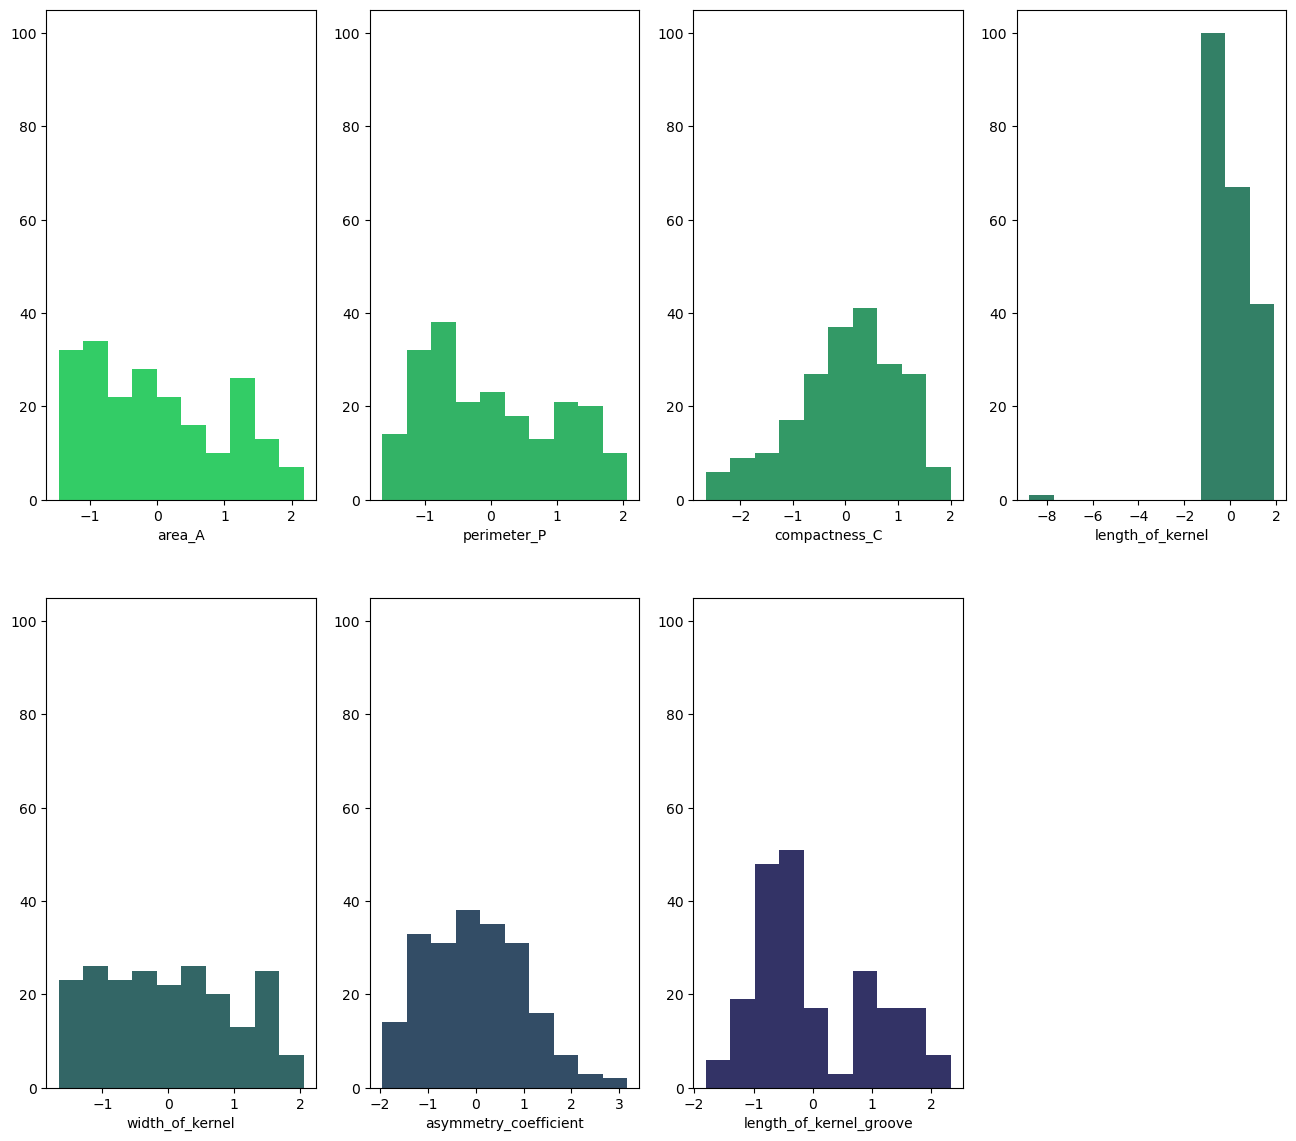

In [195]:
plt.figure(figsize=(16, 14))
# Exclude the last data point because not necessary to plot classes in histogram
numData = M - 1 
u = np.floor(np.sqrt(numData))
v = np.ceil(float(numData) / u)
for i in range(numData):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i], color=(0.2, 0.8 - i * 0.1, 0.4))
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N / 2)

plt.show()

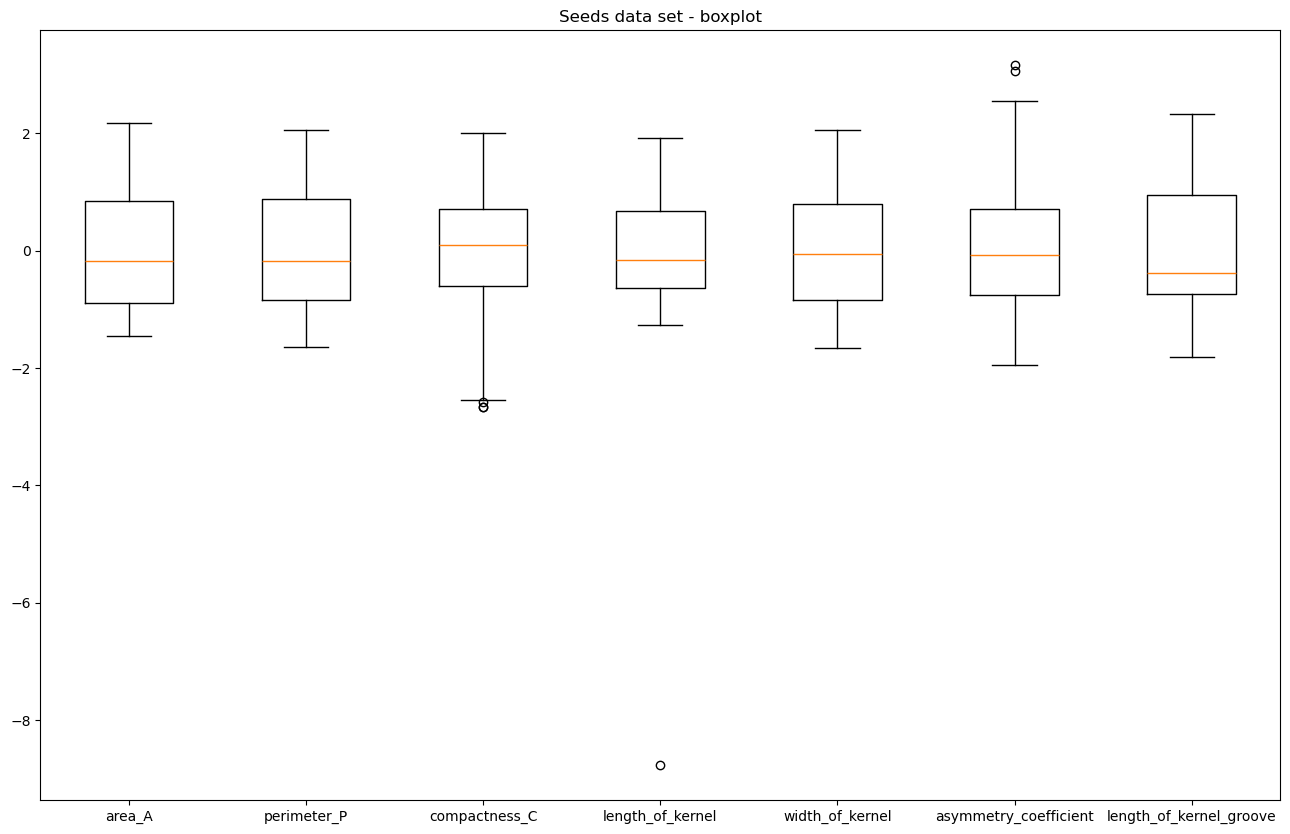

In [196]:
plt.figure(figsize=(16, 10))
plt.boxplot(X[:, :-1])
plt.xticks(range(1, numData+1), attributeNames[:-1])
plt.title("Seeds data set - boxplot")
plt.show()

### Box plot

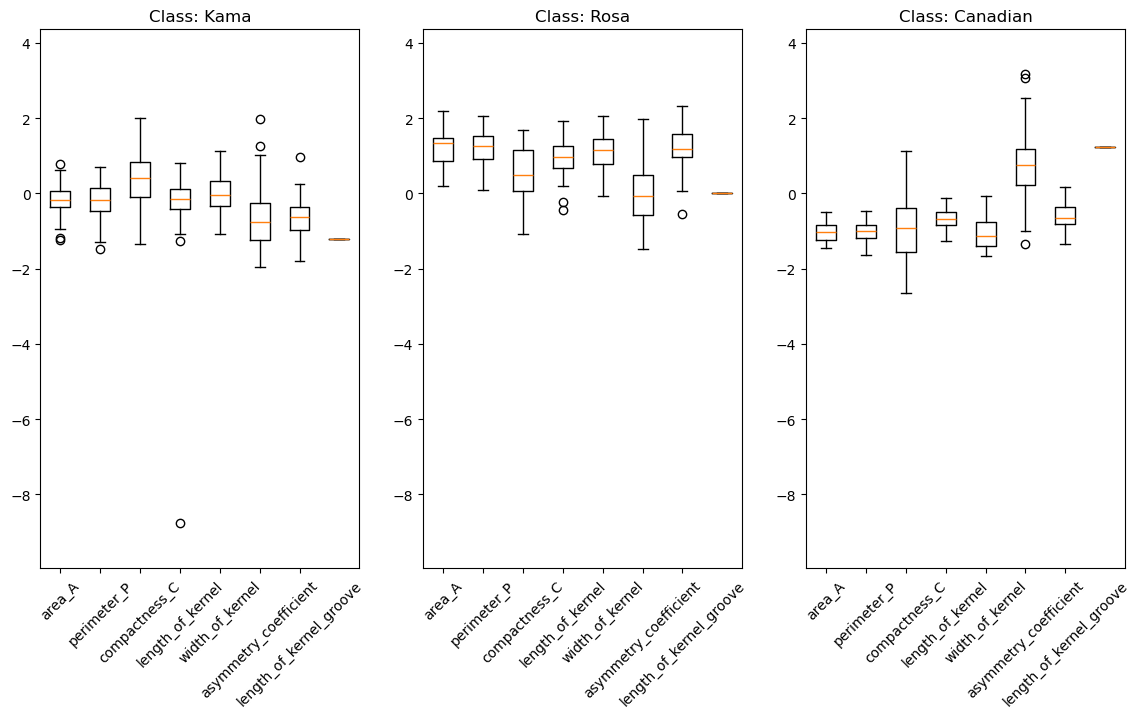

In [197]:
plt.figure(figsize=(14, 7))
for c in range(C):
    plt.subplot(1, C, c + 1)
    class_mask = y == c
    plt.boxplot(X[class_mask, :])
    plt.title("Class: " + classNames[c])
    plt.xticks(range(1, numData + 1), attributeNames[:-1], rotation=45)
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    plt.ylim(y_down, y_up)

plt.show()

## Removing outliers - Need more careful inspection of the data NOT DONE

## PCA on Seeds dataset

In [198]:
# Remove the labels from the dataset because they should not be factored into PCA analysis
X_no_label = X[:, :-1]
X_no_label.shape

(210, 7)

In [199]:
# Subtract
Y = X_no_label - np.ones((N, 1)) * X_no_label.mean(axis=0)
# SVD
U, S, Vh = np.linalg.svd(Y, full_matrices=False)
V = Vh.T
V

array([[-0.4569191 , -0.01901454,  0.04218607, -0.16586436,  0.28487615,
         0.31173175, -0.76370258],
       [-0.45325321, -0.07643169, -0.03611096, -0.20354168,  0.39698308,
         0.42659102,  0.63750376],
       [-0.2895424 ,  0.53061203,  0.57570697,  0.25369528, -0.42123597,
         0.23584232,  0.07586117],
       [-0.36239784, -0.29356118, -0.32344873,  0.82015948, -0.07196705,
        -0.00537634, -0.00090285],
       [-0.44664285,  0.12280184,  0.21278615, -0.05016317,  0.27990185,
        -0.80969356,  0.06071958],
       [ 0.12217954, -0.69239445,  0.70080808,  0.08926354,  0.07420557,
         0.03220653,  0.00429131],
       [-0.39522372, -0.36273817, -0.15636123, -0.42843039, -0.70340564,
        -0.09247697,  0.02977093]])

### A plot of the amount of variance explained as a function of the number of PCA components included

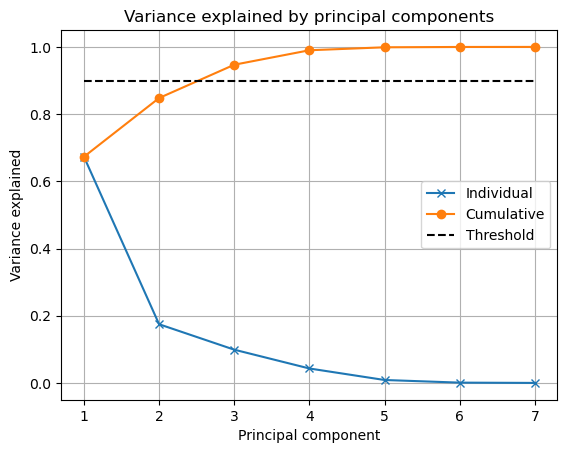

In [200]:
rho = (S * S) / (S * S).sum()

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

First three principal components explains more than 90% variance of the data

### Plot first two components in terms of the attributes

[0 1 2 3 4 5 6]


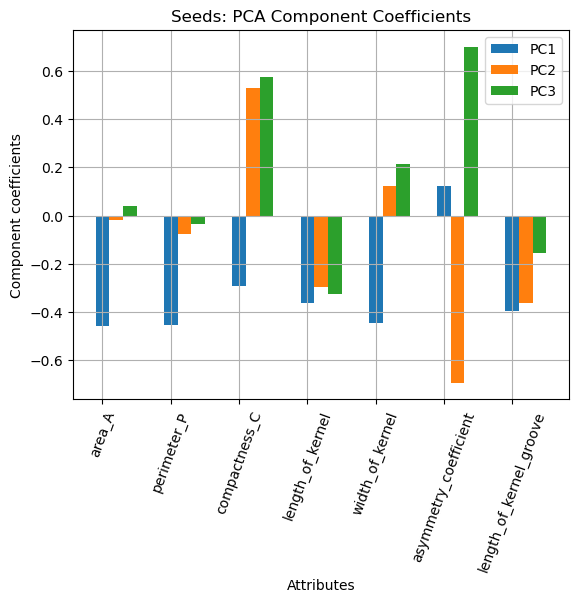

In [201]:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
box_width = 0.2
r = np.arange(0, M - 1)
print(r)
for i in pcs:
    plt.bar(r + i * box_width, V[:, i], width=box_width)

plt.xticks(r, attributeNames[:-1], rotation=70)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Seeds: PCA Component Coefficients")
plt.show()

The data projected onto the considered principal component

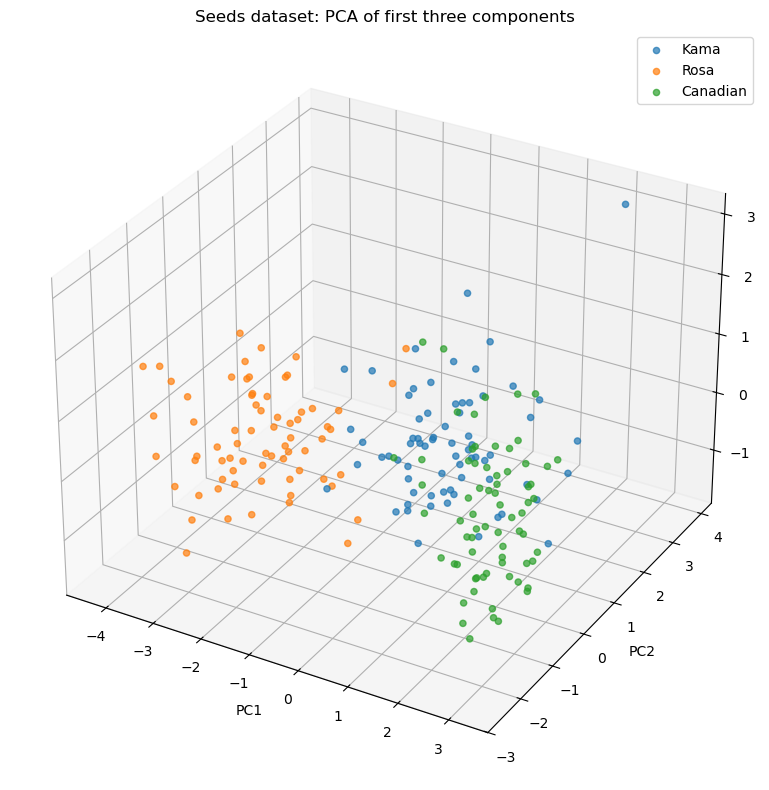

In [ ]:
# Project the centered data onto the principle component space
Z = np.dot(Y, V)
# Add back class labels for dataset
figure = plt.figure(figsize=(10, 8))
ax = figure.add_subplot(projection='3d')
plt.title("Seeds dataset: PCA of first three components")
for c in range(C):
    class_mask = y == c
    ax.scatter(Z[class_mask, 0], Z[class_mask, 1], Z[class_mask, 2], "o", alpha=0.7)
ax.legend(classNames)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

Before standardization: The attribute with the highest standard deviation will dominate the PCA results because PCA is sensitive to the scale of the data. This attribute will likely have a large magnitude in the attribute coefficients (loadings) of the principal components.

After standardization: All attributes will have the same scale (mean = 0, standard deviation = 1). The attribute with the highest standard deviation will no longer dominate, and its contribution to the principal components will be more balanced with the other attributes.

Changes in direction and magnitude:

The direction of the attribute coefficients may change because the relative importance of the attributes is reweighted.

The magnitude of the coefficients for the previously dominant attribute will decrease after standardization.

Before standardization: The principal components will likely explain a large proportion of the variance in the dominant attribute, but this may not reflect the true structure of the data.

After standardization: The variance explained by the principal components will be more evenly distributed across all attributes, providing a more balanced representation of the data.